In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
import os
os.chdir(r'd:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\RE\Reconstru--o')
print(os.getcwd())

d:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\RE\Reconstru--o


In [4]:
class PrintEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, N):
        super(PrintEveryNEpochs, self).__init__()
        self.N = N

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.N == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']}")

In [5]:
df = pd.read_excel('Desagregado\R_RJ_Reconstrucao_Carangidae_2024_08_07.xlsx')

x0 = df[['Ano', 'Xarelete_art']].dropna().values


df_x0= pd.DataFrame(x0, columns= ['Ano', 'Xarelete_art'])


x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Xarelete_art'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_12800\744500801.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Desagregado\R_RJ_Reconstrucao_Carangidae_2024_08_07.xlsx')


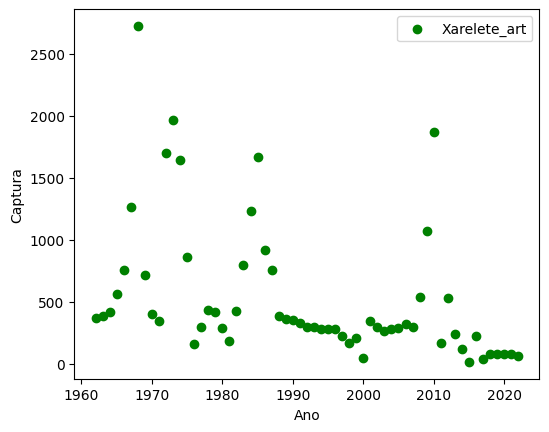

In [6]:
plt.figure(figsize=(6, 4.8))
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='Xarelete_art')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.6201968789100647
Epoch 200: loss = 0.6232627630233765
Epoch 300: loss = 0.5306268930435181
Epoch 400: loss = 0.4712252914905548
Epoch 500: loss = 1.8394458293914795
Epoch 600: loss = 0.3725832402706146
Epoch 700: loss = 0.3432536721229553
Epoch 800: loss = 0.26520201563835144
Epoch 900: loss = 0.5630659461021423
Epoch 1000: loss = 0.28705674409866333
Epoch 1100: loss = 0.26760444045066833
Epoch 1200: loss = 0.3440256118774414
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


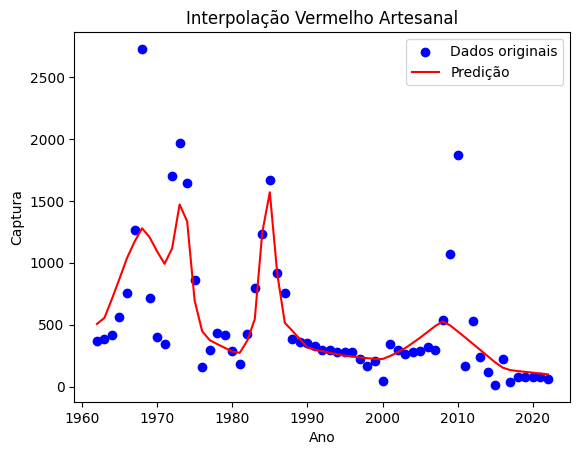

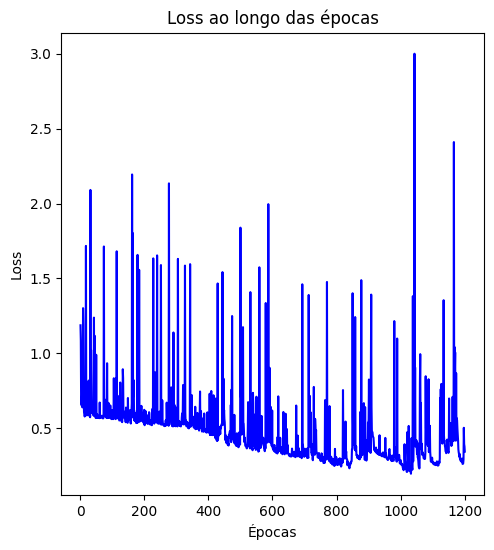

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=1200, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
model.save_weights('d:/reconstrucao_estatistica_pesqueira/reconstrucao_estatistica_brasileira/RE/Reconstru--o/PESOS/.weights.h5', overwrite=True)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Interpolação Vermelho Artesanal')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predição para o ano 1950: 819.4622802734375
Predição para o ano 1951: 819.379638671875
Predição para o ano 1952: 819.29052734375
Predição para o ano 1953: 819.2147216796875
Predição para o ano 1954: 819.1419677734375
Predição para o ano 1955: 819.0262451171875
Predição para o ano 1956: 818.8990478515625
Predição para o ano 1957: 818.853515625
Predição para o ano 1958: 818.80810546875
Predição para o ano 1959: 818.8392333984375
Predição para o ano 1960: 818.876220703125
Predição para o ano 1961: 818.9132080078125
Predição para o ano 1965: 819.3037719726562
Predição para o ano 1972: 805.69677734375
Predição para o ano 1973: 801.0568237304688
Predição para o ano 1974: 796.2438354492188
Predição para o ano 1975: 791.4307861328125
Predição para o ano 1990: 331.12994384765625
Predição para o ano 1991: 298.25408935546875
Predição para o ano 1992: 278.7911376953125
Predição para o ano 1993: 275.9252624511719
Predição para o ano 1994: 272.5532531738281
Pred

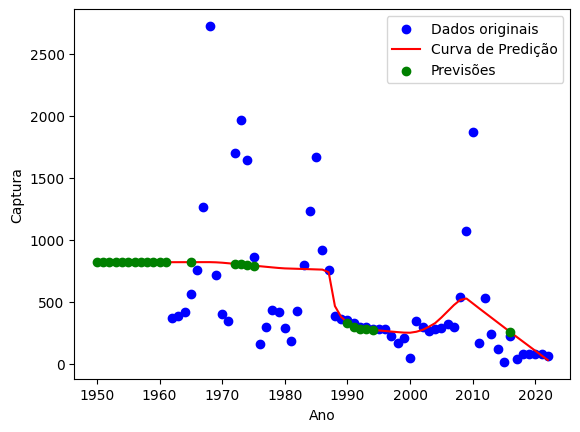

In [8]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,1965, 1972, 1973, 1974, 1975, 1990, 1991, 1992, 1993, 1994, 2016]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean
predicoes = np.maximum(predicoes, 0)

for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
#plt.title('Xarelete_art')
plt.legend()
plt.show()


In [8]:
df_combined.to_excel('R_Xarelete_art_.xlsx', index=False)